In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


In [3]:
X, y = make_regression(
    n_samples=1000,
    n_features=10,
    noise=10,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [4]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}


In [5]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)

    results.append([name, mse, rmse, r2])

results_df = pd.DataFrame(
    results,
    columns=["Model", "MSE", "RMSE", "R2 Score"]
)

results_df


,Model,MSE,RMSE,R2 Score
0,Linear Regression,95.119149,9.752905,0.994326
1,Decision Tree,6756.029480,82.195070,0.596971
2,Random Forest,2630.372254,51.287155,0.843086
3,SVR,12807.471330,113.170099,0.235975
4,KNN,3743.845958,61.186975,0.776662


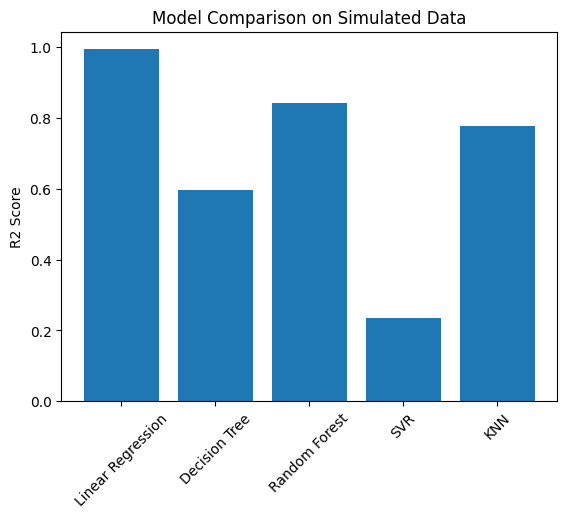

In [6]:
import matplotlib.pyplot as plt

plt.bar(results_df["Model"], results_df["R2 Score"])
plt.xticks(rotation=45)
plt.ylabel("R2 Score")
plt.title("Model Comparison on Simulated Data")
plt.show()
